# Exercise 3
## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona
- For the arriving airport, you can use the Destination column in the searches file.
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

In [1]:
import pandas as pd
import bz2
import os

In [2]:
pd.read_csv(r"C:\Users\paula\Desktop\Paula\Máster\9. Data Science challenge\challenge\searches.csv.bz2", compression= "bz2", nrows=1000, thousands= ",")

,Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
0,2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c1...
1,2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5c...
2,2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8...
3,2013-01-01^17:42:40^FXP^1864e5e8013d9414150e91...
4,2013-01-01^17:48:29^MPT^1ec336348f44207d2e0027...
...,...
995,2013-01-01^14:58:25^MPT^c8daef4f8bf73a61aa2c92...
996,2013-01-01^16:03:50^FXP^266a430550a2a2bf1ceb2e...
997,2013-01-01^02:16:11^MTP^0632d0675e69cac2473475...
998,2013-01-01^13:01:24^FFP^89cc49bf7febdbe40c1b7d...


In [3]:
departures_n10000 = pd.read_csv(r"C:\Users\paula\Desktop\Paula\Máster\9. Data Science challenge\challenge\searches.csv.bz2", compression= "bz2", sep = "^", error_bad_lines = False, memory_map = True, nrows=10000)

In [4]:
pd.options.display.max_columns = None
departures_n10000

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013-01-10,08:37:04,FQD,e8741eaf2fa2f71f931475d18fa72096,US,BJX,LAX,0,1,BJX,LAX,2013-02-08,NV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SEA
9996,2013-01-10,10:58:46,FCP,7da60d9e60a322d3fff7e00cb62baa53,BR,GRU,REC,0,1,GRU,REC,2013-01-23,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
9997,2013-01-10,15:32:04,FXA,be00295076af5aa39c27a0af17b58b26,DE,FRA,PEK,0,2,FRA,PEK,2013-01-22,MK,F,PEK,HGH,2013-01-23,MK,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CGN
9998,2013-01-10,16:45:10,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,ROM,PAR,0,1,ROM,PAR,2013-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR


In [5]:
searches = pd.read_csv(r"C:\Users\paula\Desktop\Paula\Máster\9. Data Science challenge\challenge\searches.csv.bz2", compression= "bz2", sep = "^", error_bad_lines = False, memory_map = True, usecols = ["Date", "Destination"], nrows=10000)
searches

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD
...,...,...
9995,2013-01-10,LAX
9996,2013-01-10,REC
9997,2013-01-10,PEK
9998,2013-01-10,PAR


Let's have a look at the data in the first 1000 rows, so we can then normalise if needed for all the dataframe

In [6]:
searches["Destination"].str.len().mean()

3.0

In the first 10000 rows, all codes have length 3, but I don't trust this, so I'll normalise when I do the chunks

In [7]:
all_letters = searches["Destination"].str.isalpha()
all_letters


0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Destination, Length: 10000, dtype: bool

In [8]:
import numpy as np

In [9]:
np.count_nonzero(all_letters)

10000

In [10]:
searches["Destination"].str.upper()

0       AUH
1       MIL
2       SFO
3       ARN
4       MAD
       ... 
9995    LAX
9996    REC
9997    PEK
9998    PAR
9999    CUN
Name: Destination, Length: 10000, dtype: object

In [11]:
all_upper = searches["Destination"].str.isupper()
np.count_nonzero(all_upper)

10000

In [12]:
searches["Date"] = searches["Date"].astype("datetime64")
searches["Date"]

0      2013-01-01
1      2013-01-01
2      2013-01-01
3      2013-01-01
4      2013-01-01
          ...    
9995   2013-01-10
9996   2013-01-10
9997   2013-01-10
9998   2013-01-10
9999   2013-01-10
Name: Date, Length: 10000, dtype: datetime64[ns]

In [13]:
searches['Month'] = searches['Date'].dt.strftime('%m')

searches

,Date,Destination,Month
0,2013-01-01,AUH,01
1,2013-01-01,MIL,01
2,2013-01-01,SFO,01
3,2013-01-01,ARN,01
4,2013-01-01,MAD,01
...,...,...,...
9995,2013-01-10,LAX,01
9996,2013-01-10,REC,01
9997,2013-01-10,PEK,01
9998,2013-01-10,PAR,01


In [14]:
searches_by_airport = searches.groupby(["Destination", "Month"]).count()
searches_by_airport.reset_index(inplace = True)
searches_by_airport

,Destination,Month,Date
0,AAL,01,2
1,AAQ,01,1
2,ABE,01,2
3,ABJ,01,2
4,ABQ,01,4
...,...,...,...
1050,ZRH,01,72
1051,ZSE,01,1
1052,ZTH,01,3
1053,ZUH,01,1


In [15]:
searches_by_airport.columns.values

array(['Destination', 'Month', 'Date'], dtype=object)

## Let's try and do it in chunks

In [16]:
chunksize = 10000
searches_chunks = pd.read_csv(r"C:\Users\paula\Desktop\Paula\Máster\9. Data Science challenge\challenge\searches.csv.bz2",
                              compression= "bz2", 
                              sep = "^",
                              error_bad_lines = False,
                              memory_map = True,
                              usecols = ["Date", "Destination"],
                              chunksize= chunksize)

In [17]:
searches_chunks

IATA codes for Madrid, Barcelona and Málaga:

iata_codes = ["MAD", "BCN", "AGP"]

I've added a break after the first chunk to check that I don't have any errors in the code before it takes around 3 minutes to read it all:

In [18]:
%%time
chunksize = 100000
searches_chunks = pd.read_csv(r"C:\Users\paula\Desktop\Paula\Máster\9. Data Science challenge\challenge\searches.csv.bz2",
                              compression= "bz2", 
                              sep = "^",
                              error_bad_lines = False,
                              memory_map = True,
                              usecols = ["Date", "Destination"],
                              chunksize= chunksize, dtype =str)

all_chunks = pd.DataFrame()
iata_codes = ["MAD", "BCN", "AGP"]

for df in searches_chunks:

    df.dropna(inplace = True)
    print(len(df))
    df["Destination"] = df["Destination"].str.strip().str.upper()
    
    df['Date']=pd.to_datetime(df['Date'])
    df['Month']=df['Date'].dt.month

    df = df[df['Destination'].isin(['MAD', 'BCN', 'AGP'])]

        
    result_chunk = df.groupby(["Destination", "Month"]).count().reset_index()


    all_chunks = all_chunks.append(result_chunk)
    
    break
    
result_all = all_chunks.groupby(["Destination", "Month"]).sum().reset_index()

100000
Wall time: 550 ms


In [19]:
result_all

,Destination,Month,Date
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517
5,BCN,2,497
6,BCN,3,536
7,BCN,4,174
8,MAD,1,425
9,MAD,2,400


In [20]:
result_all

,Destination,Month,Date
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517
5,BCN,2,497
6,BCN,3,536
7,BCN,4,174
8,MAD,1,425
9,MAD,2,400


Now let's try and do it for the whole dataframe:

In [21]:
%%time
chunksize = 100000
searches_chunks = pd.read_csv(r"C:\Users\paula\Desktop\Paula\Máster\9. Data Science challenge\challenge\searches.csv.bz2",
                              compression= "bz2", 
                              sep = "^",
                              error_bad_lines = False,
                              memory_map = True,
                              usecols = ["Date", "Destination"],
                              chunksize= chunksize, dtype =str)

all_chunks = pd.DataFrame()
iata_codes = ["MAD", "BCN", "AGP"]

for df in searches_chunks:

    df.dropna(inplace = True)
    df["Destination"] = df["Destination"].str.strip().str.upper()
    df['Date']=pd.to_datetime(df['Date'])
    df['Month']=df['Date'].dt.month
   

    df = df[df['Destination'].isin(['MAD', 'BCN', 'AGP'])]

        
    result_chunk = df.groupby(["Destination", "Month"]).count().reset_index()


    all_chunks = all_chunks.append(result_chunk)
    
 
result_all = all_chunks.groupby(["Destination", "Month"]).sum().reset_index()

Wall time: 4min 18s


In [22]:
result_all

,Destination,Month,Date
0,AGP,1,9633
1,AGP,2,8379
2,AGP,3,10659
3,AGP,4,8265
4,AGP,5,10830
5,AGP,6,7923
6,AGP,7,8892
7,AGP,8,7866
8,AGP,9,8151
9,AGP,10,6499


I'm going to change the name of column "Date" to "Column" so it makes more sense, as that is the count of monthly number of searches:

In [23]:
result_all = result_all.rename(columns={"Date":"Count"})
result_all.head()

,Destination,Month,Count
0,AGP,1,9633
1,AGP,2,8379
2,AGP,3,10659
3,AGP,4,8265
4,AGP,5,10830


Now, I'm going to plot the results

In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

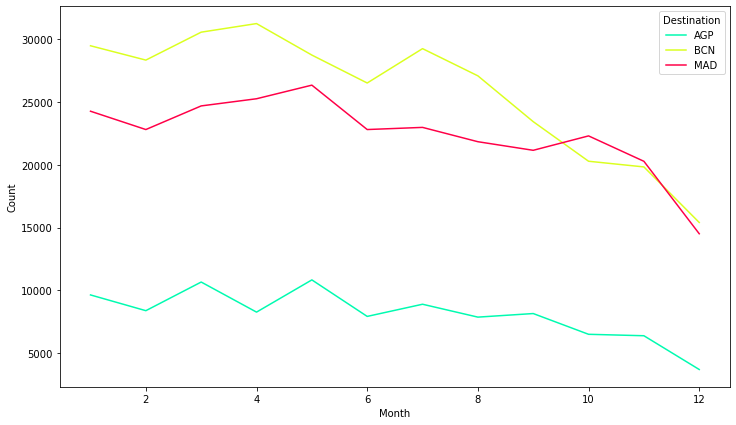

In [26]:
fig, ax = plt.subplots(figsize=(12,7))

sns.lineplot(data = result_all, x = "Month", y = "Count", hue = "Destination", ax = ax, palette= "gist_ncar");


In [27]:
result_all_wide = result_all.pivot("Month", "Destination", "Count")
result_all_wide.head()

Destination,AGP,BCN,MAD
Month,,,
1,9633,29469,24258
2,8379,28329,22800
3,10659,30552,24681
4,8265,31236,25251
5,10830,28728,26334


<AxesSubplot:xlabel='Month'>

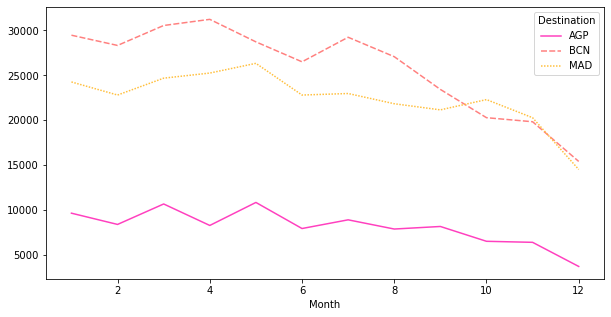

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = result_all_wide, palette= "spring")